## Introduction
Identifying features to predict the value of a target variable is an
important task in machine learning. This process can be automated by
using SelectFromModel class from scikit learn. On this small tutorial we
will show how this can be done. As an example, we will build an model to
predict [students performance](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression) index from a kaggle data set.

## 1. Data Acquisition

In [60]:
from pathlib import Path
import zipfile
import kagglehub

In [2]:
## retrieves current path
curr_path = Path('.')

## set up the path at which the data set will be moved to
target_path = curr_path / 'dataset'
target_path.mkdir(exist_ok=True)

You have a few options to download the data set:

- use kaggle API to download it, by running the cell which starts with
  (1);

- download it directly from kaggle, place it at the same directory of
  this notebook and the cell which starts with (2), to decompress it;

In [3]:
## (1) download data set from kaggle site
destination_path = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")
print("Path to dataset files:", destination_path)

destination_path = Path(destination_path)
destination_path.rename(target_path)
print(f"Moved the data set to {target_path.name} directory at current path.")

Path to dataset files: /home/gasobral/.cache/kagglehub/datasets/nikhil7280/student-performance-multiple-linear-regression/versions/1
Moved the data set to dataset directory at current path.


In [4]:
## (2) download the compressed data set from kaggle, place it with
## notebook and execute this code to decompress it
for compressed_file in curr_path.glob("*.zip"):
    print(f'Decompressing the file: {compressed_file}')

    with zipfile.ZipFile(compressed_file, 'r') as zip_ref:
        zip_ref.extractall(target_path)
        print(f'Decompressed the file at: {target_path.name}')

Decompressing the file: dateset.zip
Decompressed the file at: dataset


In [4]:
print(f'Files at {target_path.name} directory.')

for csv_file in target_path.glob('*.csv'):
    print(csv_file)

Files at dataset directory.
dataset/Student_Performance.csv


## 2. Data set load

In [5]:
import pandas as pd

In [6]:
students_data = pd.read_csv(csv_file)

In [7]:
students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [9]:
students_data.head()

Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0

In [10]:
mask = students_data.duplicated()
students_data[mask]

Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
915               9               52                         No            5   
1477              7               61                        Yes            6   
1601              5               99                         No            7   
1786              2               62                        Yes            9   
2026              5               87                        Yes            6   
...             ...              ...                        ...          ...   
9644              4               91                        Yes            4   
9940              8               95                         No            5   
9954              6               97                         No            8   
9966              1               41                         No            7   
9985              8               99                         No            5   

      Sample Question Papers Practiced  Performance Index  
915                                  9               48.0  
1477                                 8               54.0  
1601                                 5               89.0  
1786                                 4               40.0  
2026                                 7               74.0  
...                                ...                ...  
9644                                 3               71.0  
9940                                 2               90.0  
9954                                 7               92.0  
9966                                 3               12.0  
9985                                 5               92.0  

[127 rows x 6 columns]

In [11]:
students_data.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

On our first check on the data, we found 127 duplicated lines and no
null values.

## 3. Data Analysis

In [55]:
students_data.describe().T

count     mean        std   min   25%  \
Hours Studied                     10000.0   4.9929   2.589309   1.0   3.0   
Previous Scores                   10000.0  69.4457  17.343152  40.0  54.0   
Sleep Hours                       10000.0   6.5306   1.695863   4.0   5.0   
Sample Question Papers Practiced  10000.0   4.5833   2.867348   0.0   2.0   
Performance Index                 10000.0  55.2248  19.212558  10.0  40.0   

                                   50%   75%    max  
Hours Studied                      5.0   7.0    9.0  
Previous Scores                   69.0  85.0   99.0  
Sleep Hours                        7.0   8.0    9.0  
Sample Question Papers Practiced   5.0   7.0    9.0  
Performance Index                 55.0  71.0  100.0

Data seems to be well distributed, since the $Q_1$ and $Q_3$ are within
one standard deviation from median, min. and max. are 2 standard
deviation from median. And also, we may know have outliers since there
is big different between mean and median.

In [12]:
import matplotlib.pyplot as plt

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64


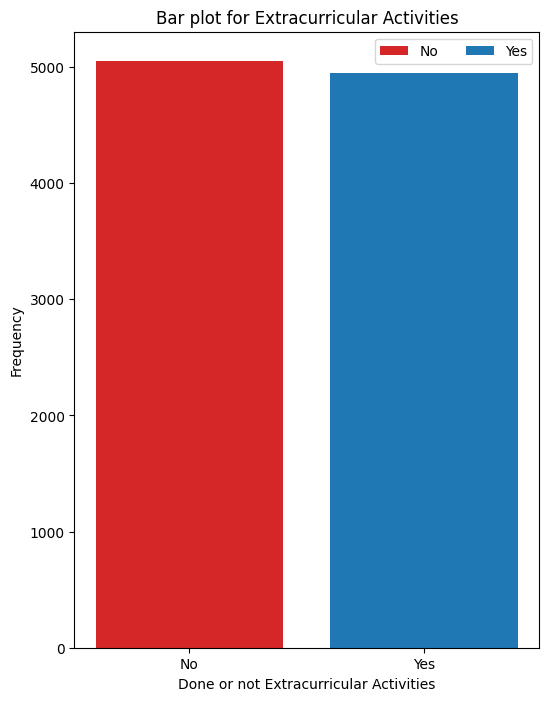

In [13]:
fig, ax = plt.subplots(figsize=(6, 8))

category_data = students_data['Extracurricular Activities'].value_counts()
categories = category_data.index.tolist()
categories_values = category_data.values

print(category_data)

ax.bar(categories,
       categories_values,
       label=['No', 'Yes'],
       color=['tab:red', 'tab:blue'])

ax.set_xlabel('Done or not Extracurricular Activities')
ax.set_ylabel('Frequency')
ax.legend(loc='upper right', ncols=2)
ax.set_title('Bar plot for Extracurricular Activities')

plt.show()

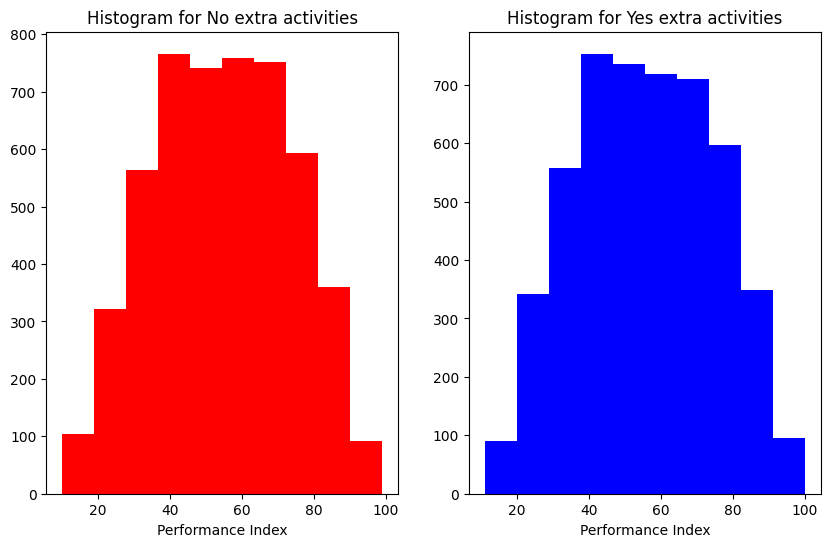

In [54]:
mask = students_data['Extracurricular Activities'] == 'Yes'
extra_act_no = students_data[~mask]
extra_act_yes = students_data[mask]

fig, ax = plt.subplots(1, 2, figsize=(10,6))

ax[0].hist(x=extra_act_no['Performance Index'],
           color='red')
ax[0].set_title('Histogram for No extra activities')
ax[0].set_xlabel('Performance Index')

ax[1].hist(x=extra_act_yes['Performance Index'],
           color='blue')
ax[1].set_title('Histogram for Yes extra activities')
ax[1].set_xlabel('Performance Index')

plt.show()

The amount of students that did or did not participated in
extracurricular activities are quite similar. Moreover, extracurricular
activities do not seem to have a strong relationship to performance
index, because their distribution are similar.

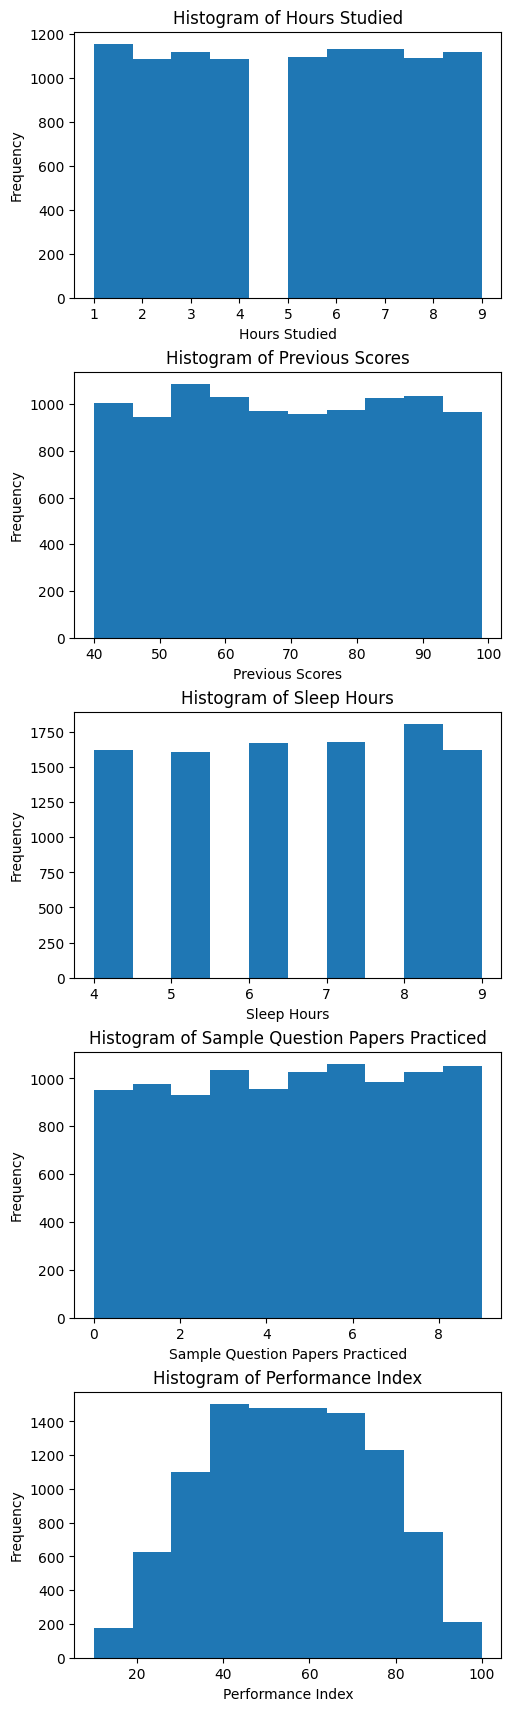

In [57]:
numeric_data = students_data.select_dtypes(include='number')

fig, axs = plt.subplots(numeric_data.shape[1],
                        1,
                        layout="constrained",
                        figsize=(5,17))

for ax, num_col in zip(axs, numeric_data.columns):
    ax.hist(numeric_data[num_col])
    ax.set_xlabel(num_col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {num_col}')

plt.show()

Histograms contribute to our suspicious that the data is well
distributed. Now we check for correlations.

In [39]:
import seaborn as sns

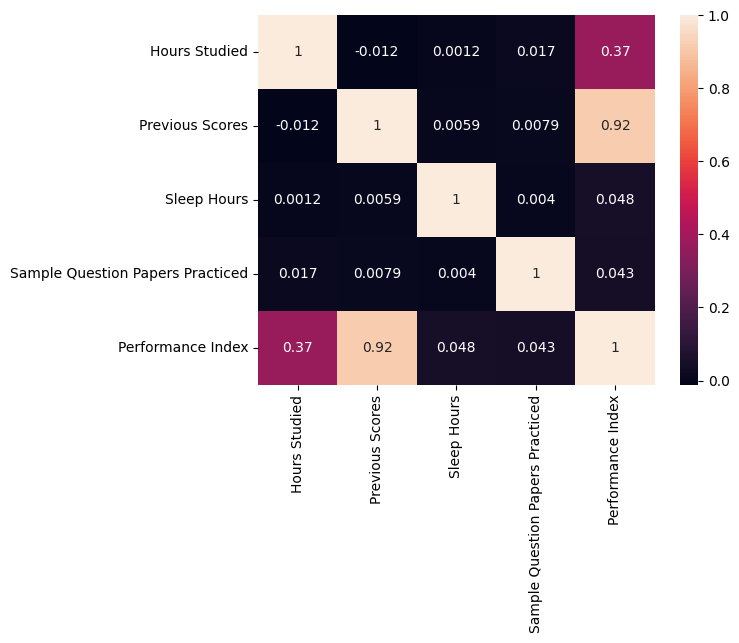

In [16]:
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Previous scores and hours studied have the strongest linear correlation
to performance index. 

### 4. Model creation

In [17]:
from sklearn.pipeline          import Pipeline
from sklearn.compose           import ColumnTransformer
from sklearn.preprocessing     import StandardScaler
from sklearn.preprocessing     import OrdinalEncoder
from sklearn.model_selection   import RandomizedSearchCV
from sklearn.model_selection   import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble          import RandomForestRegressor

In [18]:
num_processing = Pipeline(steps=[
    ('normalization', StandardScaler())
])

In [19]:
cat_processing = Pipeline(steps=[
    ('encoding', OrdinalEncoder()),
])

In [58]:
## create the columns to be used in preprocessing with column transformer
cat_cols = students_data.select_dtypes(include='object').columns.to_list()
num_cols = students_data.select_dtypes(include='number').columns.to_list()

## target is removed, because we will not execute the preprocessing on it
num_cols.remove('Performance Index')

In [22]:
pre_processing = ColumnTransformer(
    transformers=[
        ('num_processing', num_processing , num_cols),
        ('cat_processing', cat_processing, cat_cols)
    ],
    remainder='passthrough'
)

In [23]:
## creates the parametes for the randomized grid search
param_grid = [
    {'forest__n_estimators': [100, 150],
     'forest__criterion': ['squared_error', 'absolute_error']}
]

## pipeline to tune random forest parameters
forest_pipeline = Pipeline(steps=[
    ('pre_processing', pre_processing),
    ('forest', RandomForestRegressor())
])

random_searchcv = RandomizedSearchCV(
    forest_pipeline,
    param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error'
)

In [59]:
## for modeling, we drop the duplicated lines
students_data.drop_duplicates(inplace=True)

X = students_data.drop(columns=['Performance Index'])
y = students_data['Performance Index']

In [25]:
## tune the parameters (this can take a while)
random_searchcv.fit(X, y)

/home/gasobral/.local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pre_processing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num_processing',
                                                                               Pipeline(steps=[('normalization',
                                                                                                StandardScaler())]),
                                                                               ['Hours '
                                                                                'Studied',
                                                                                'Previous '
                                                                                'Scores',
                                                                                'Sleep '
                                                                                'Hours',
                                                                                'Sample '
                                                                                'Question '
                                                                                'Papers '
                                                                                'Practiced']),
                                                                              ('cat_processing',
                                                                               Pipeline(steps=[('encoding',
                                                                                                OrdinalEncoder())]),
                                                                               ['Extracurricular '
                                                                                'Activities'])])),
                                             ('forest',
                                              RandomForestRegressor())]),
                   param_distributions=[{'forest__criterion': ['squared_error',
                                                               'absolute_error'],
                                         'forest__n_estimators': [100, 150]}],
                   scoring='neg_root_mean_squared_error')

In [26]:
random_searchcv.best_params_

{'forest__n_estimators': 150, 'forest__criterion': 'absolute_error'}

Below we use the
[SelectFromModel](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html)
in order to automate the process of selection features to the
model. When we instantiate an object on this class, we must provide an
estimator which implements *feature_importantes_* or *coef_*. As
optional argument, we can provide a threshold (minimum score to accept a
feature). In our example, we will use a random forest.

In [27]:
best_estimator = random_searchcv.best_params_['forest__n_estimators']
best_criterion = random_searchcv.best_params_['forest__criterion']

## we use SelectFromModel in order to obtain the most relevant features for
## the model
## in this example we used a random forest for it
## the threshold means the minimum score a feature must have in order to be
## accepted (computed by feature importante, from random forest)
selector_pipeline = Pipeline(steps=[
    ('pre_processing', pre_processing),
    ('feature_selection', SelectFromModel(RandomForestRegressor(random_state=42),
                                          threshold=0.005)),
    ('forest_model', RandomForestRegressor(n_estimators=best_estimator,
                                           criterion=best_criterion))
])

In [28]:
## Now we just check the performance of our model
selector_rmses = -cross_val_score(selector_pipeline,
                                  X,
                                  y,
                                  scoring='neg_root_mean_squared_error',
                                  cv=3)

pd.Series(selector_rmses).describe()

count    3.000000
mean     2.507291
std      0.006960
min      2.500556
25%      2.503708
50%      2.506861
75%      2.510659
max      2.514456
dtype: float64

## Conclusion
We could successfully create a model using SelectFromModel to retrieve features
to it.